In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os
import glob

ch_path = '/home/bijeon/project/AD1/'
os.chdir(ch_path)


Train data: Data without anomalies  
Test data: Data contains anomalies (point and contextual types)  

In [2]:
FileList = glob.glob('./data/train/*.npy')
LabelData = pd.read_csv('./labeled_anomalies.csv')
LabelSMAP = LabelData[LabelData['spacecraft']=='SMAP']
LabelMSL = LabelData[LabelData['spacecraft']=='MSL']
print(LabelData)

   chan_id spacecraft                           anomaly_sequences  \
0      P-1       SMAP  [[2149, 2349], [4536, 4844], [3539, 3779]]   
1      S-1       SMAP                              [[5300, 5747]]   
2      E-1       SMAP                [[5000, 5030], [5610, 6086]]   
3      E-2       SMAP                              [[5598, 6995]]   
4      E-3       SMAP                              [[5094, 8306]]   
..     ...        ...                                         ...   
77    P-11        MSL                [[1778, 1898], [1238, 1344]]   
78    D-15        MSL                              [[1500, 2140]]   
79    D-16        MSL                               [[600, 1250]]   
80     M-7        MSL                               [[940, 1040]]   
81     F-8        MSL                              [[1950, 2486]]   

                                   class  num_values  
0   [contextual, contextual, contextual]        8505  
1                                [point]        7331  
2     

/home/bijeon/anaconda3/envs/bijeon/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


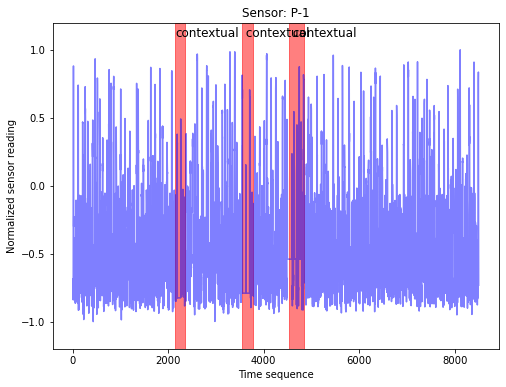

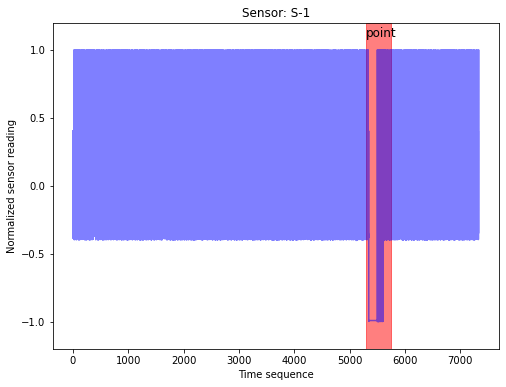

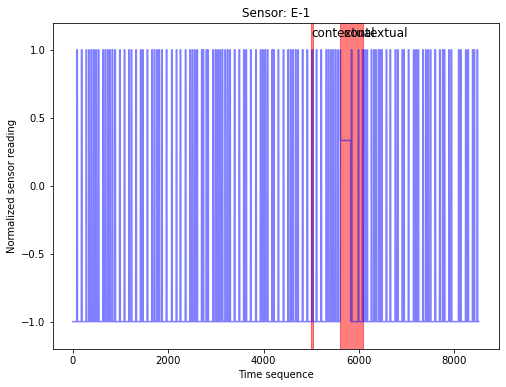

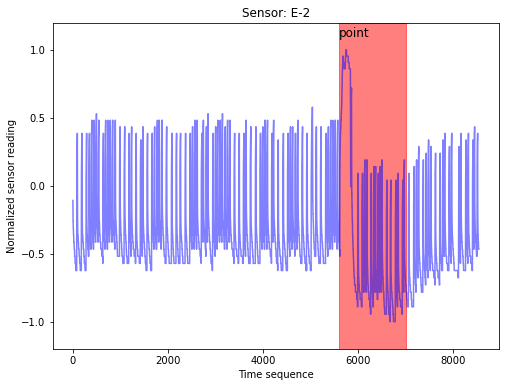

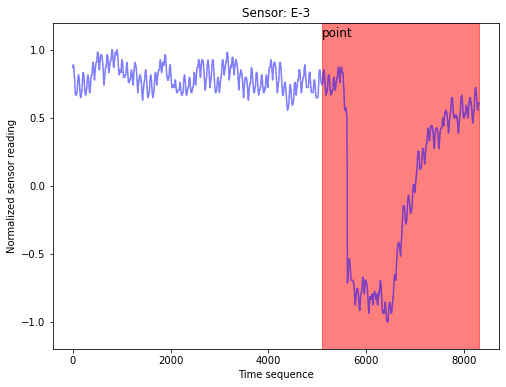

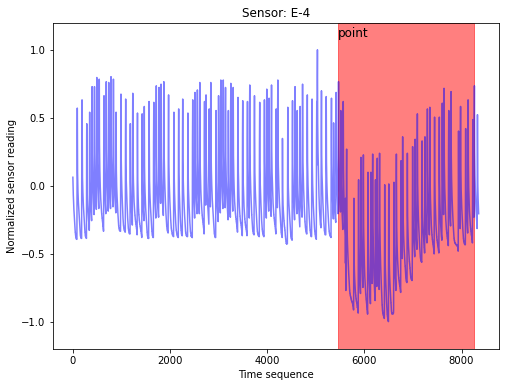

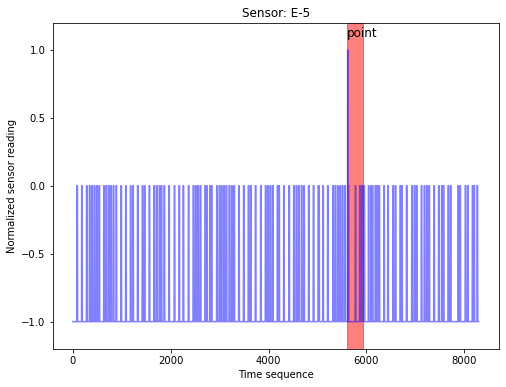

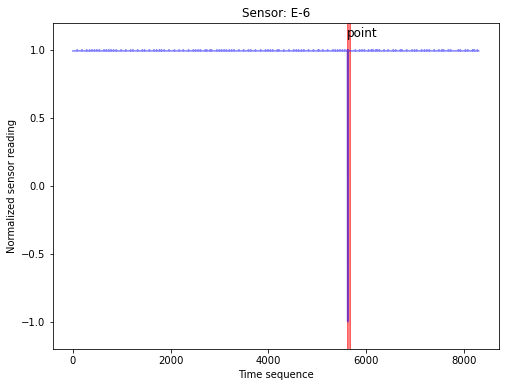

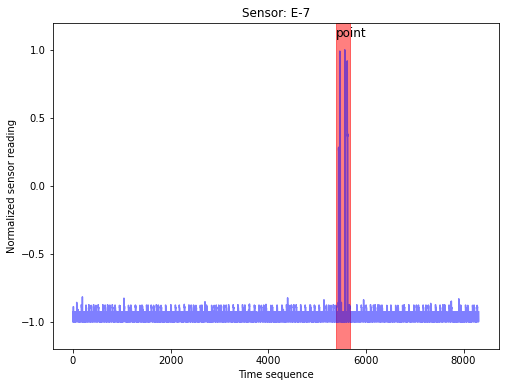

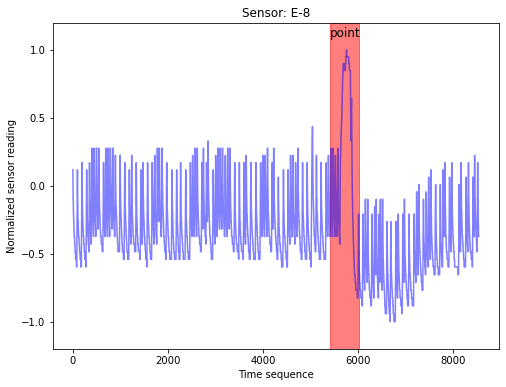

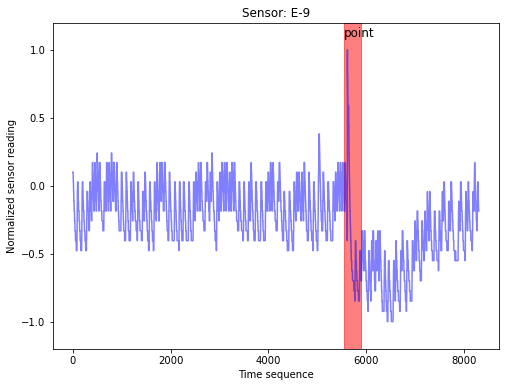

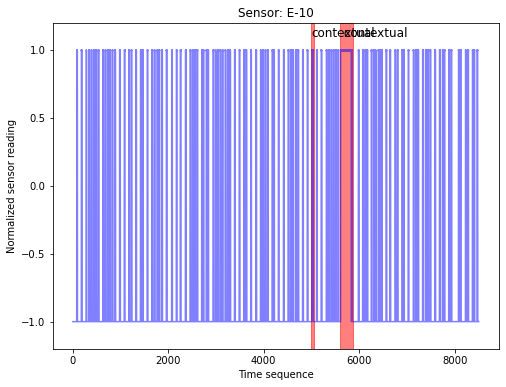

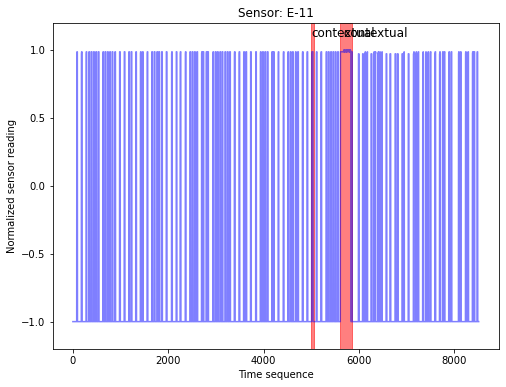

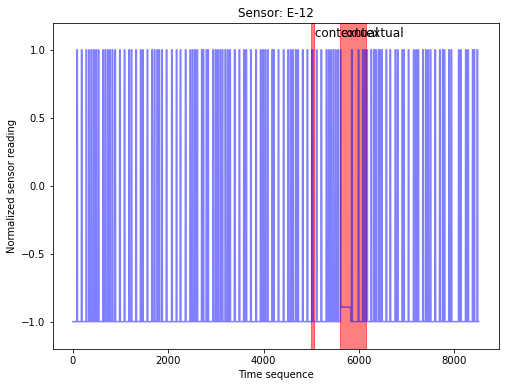

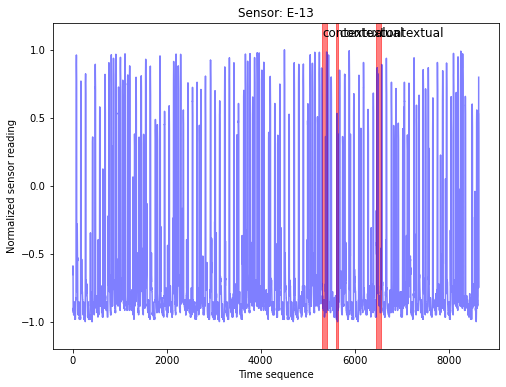

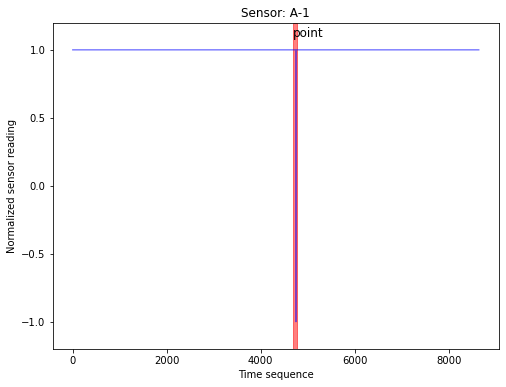

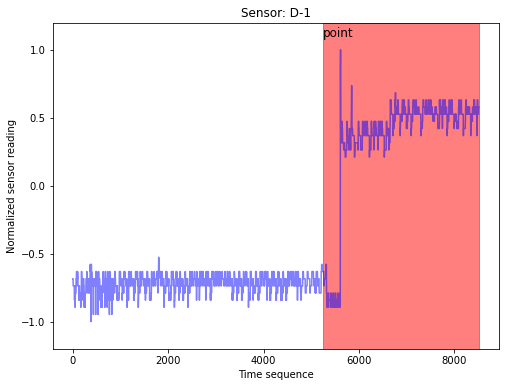

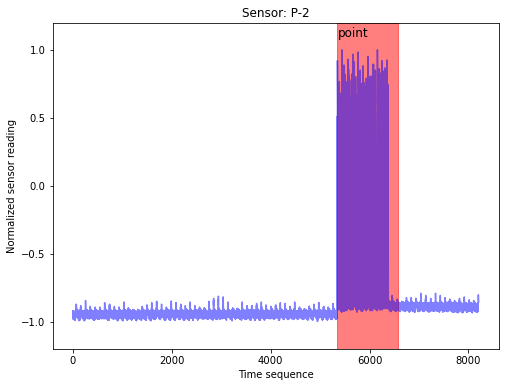

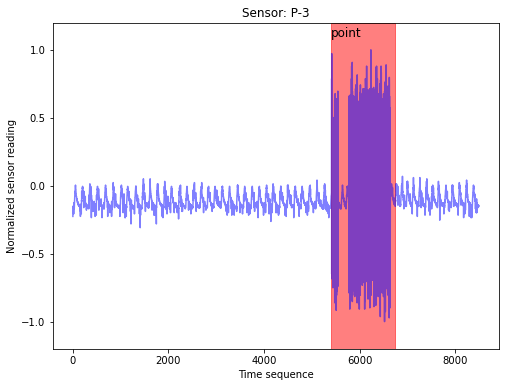

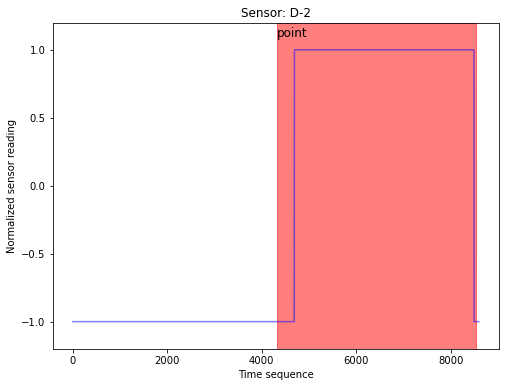

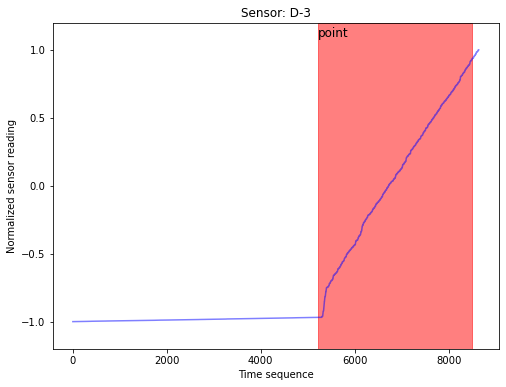

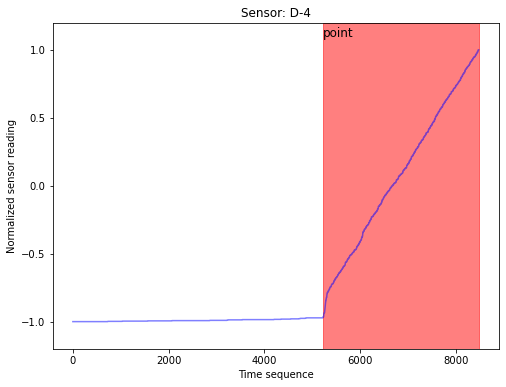

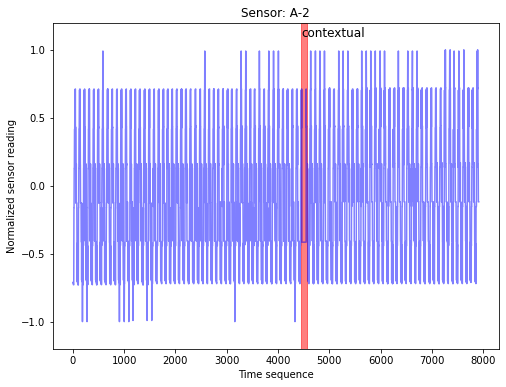

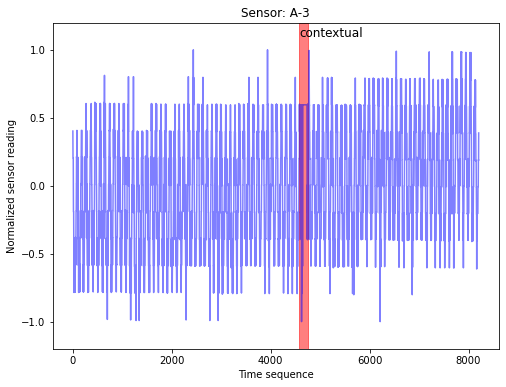

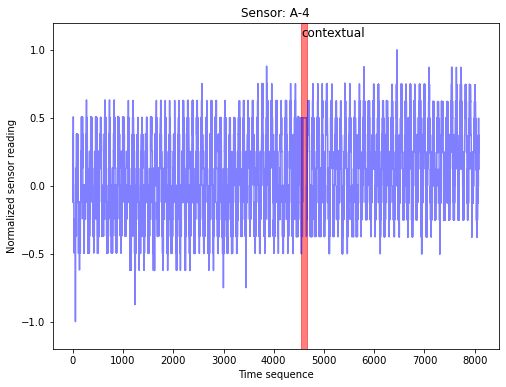

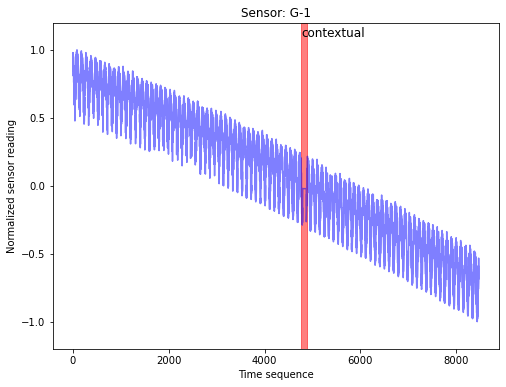

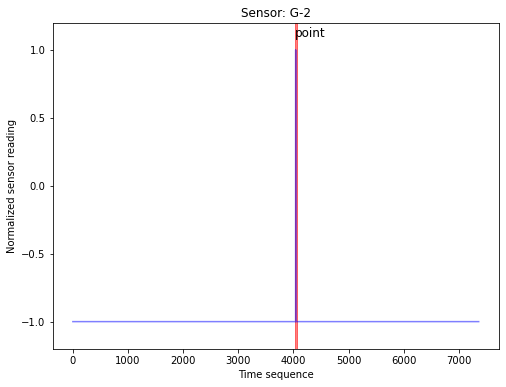

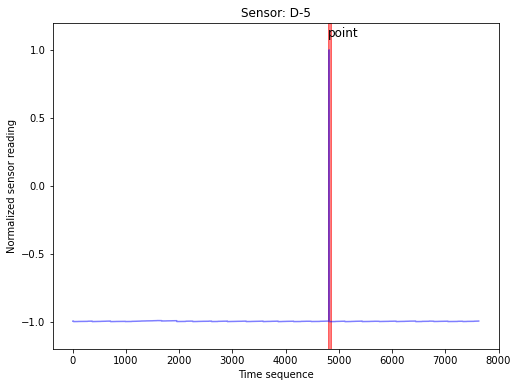

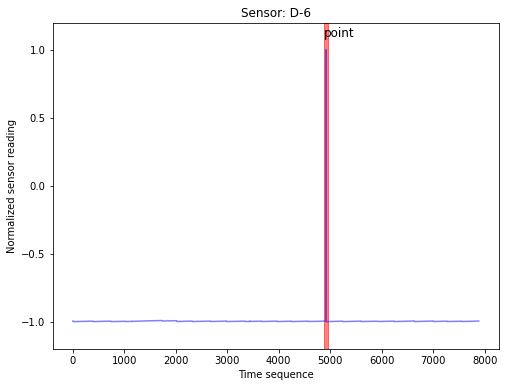

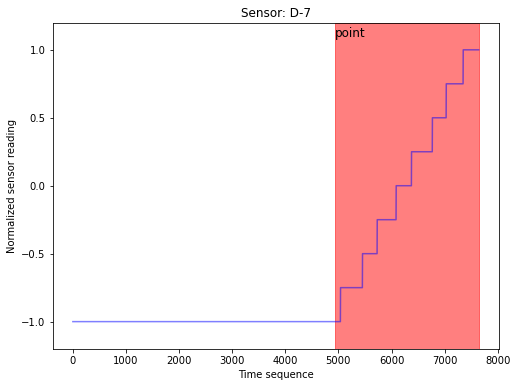

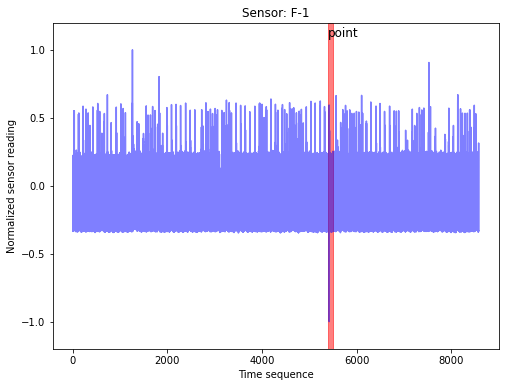

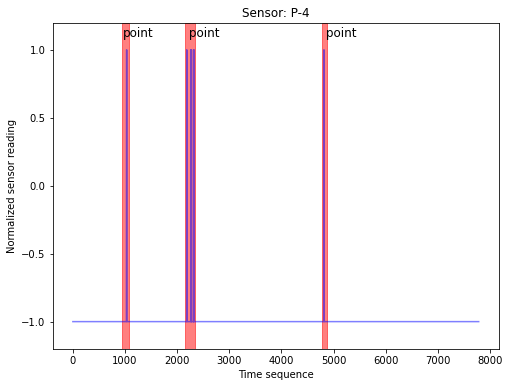

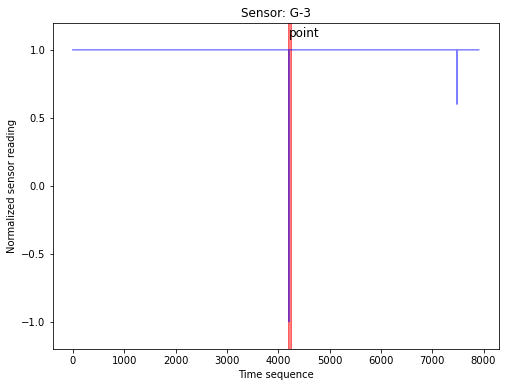

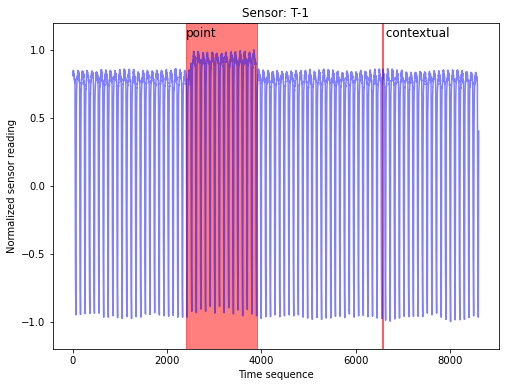

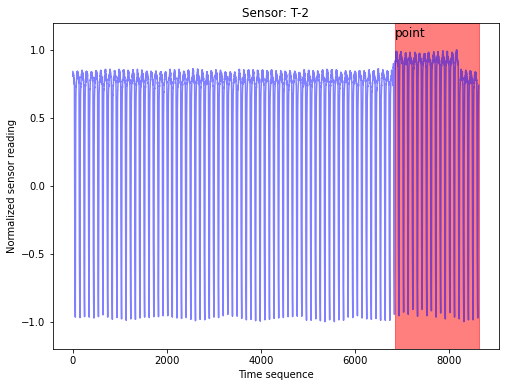

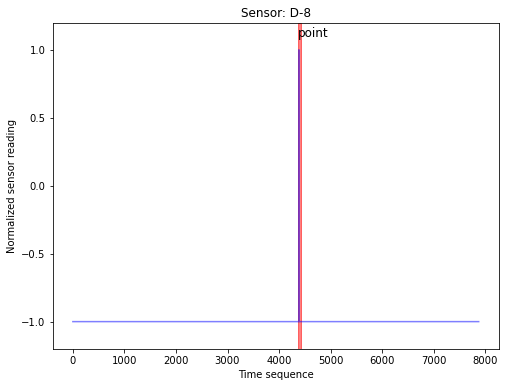

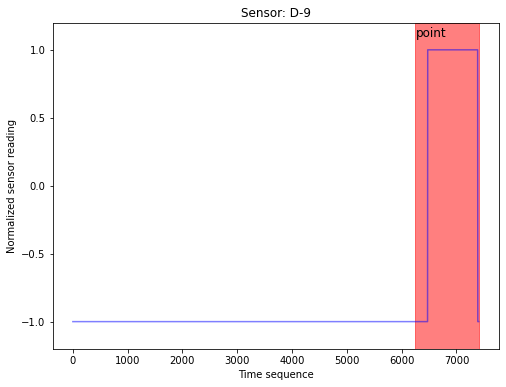

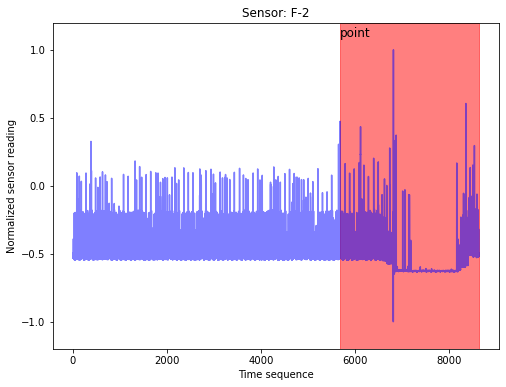

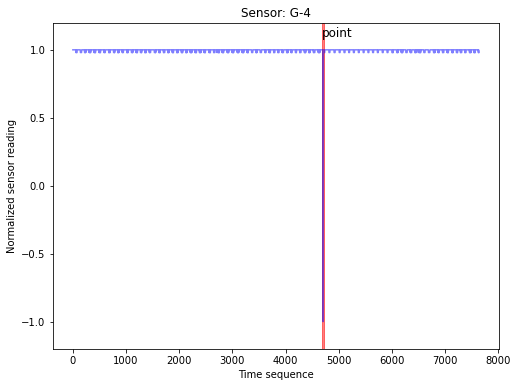

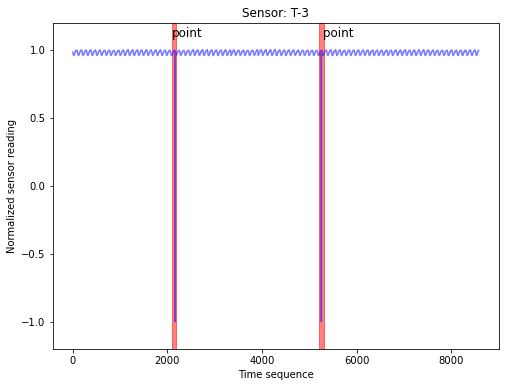

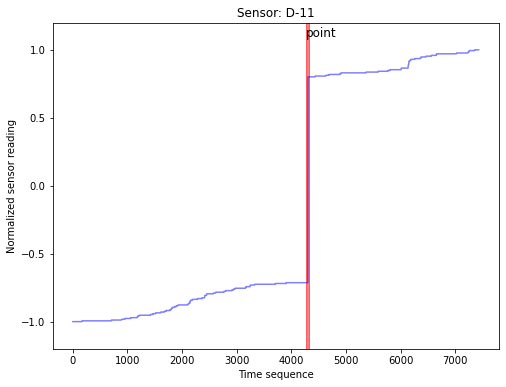

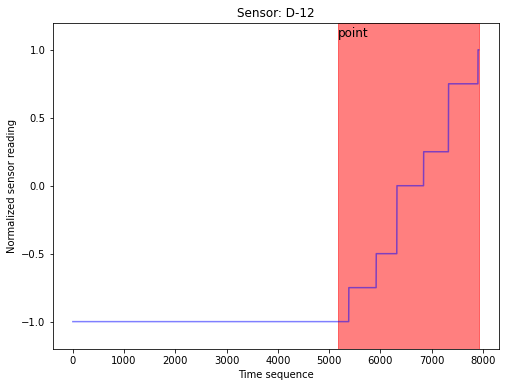

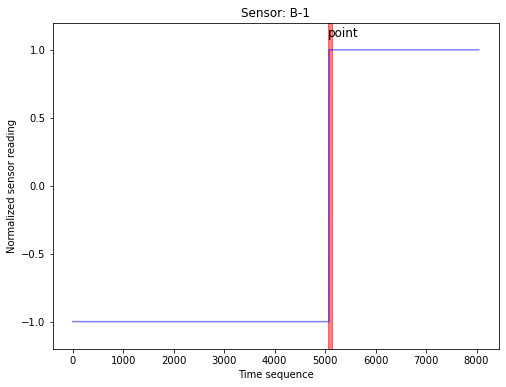

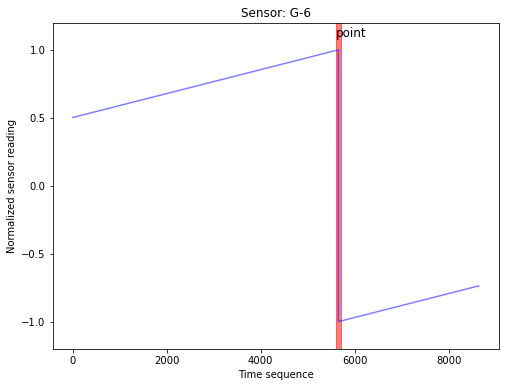

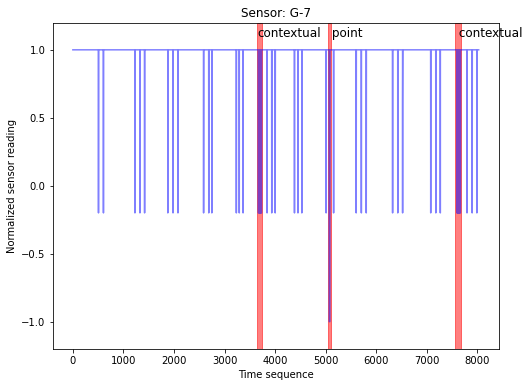

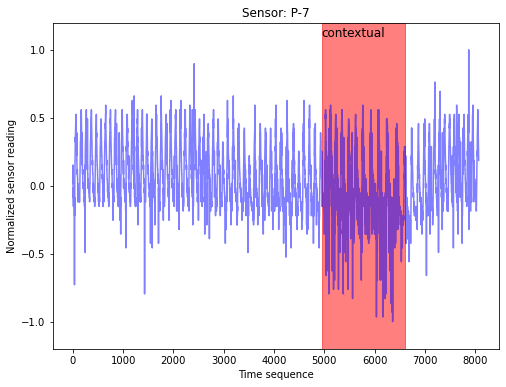

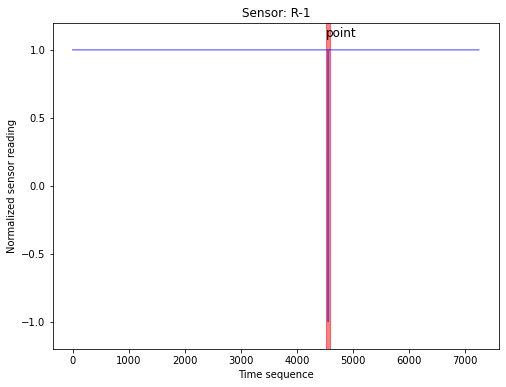

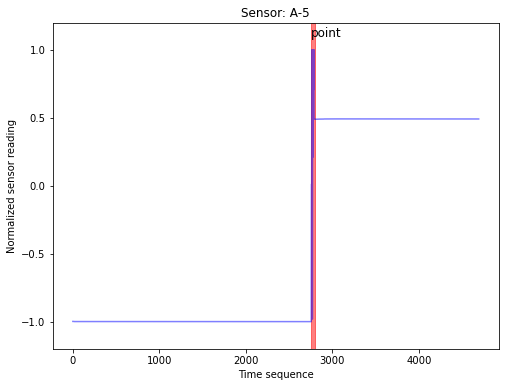

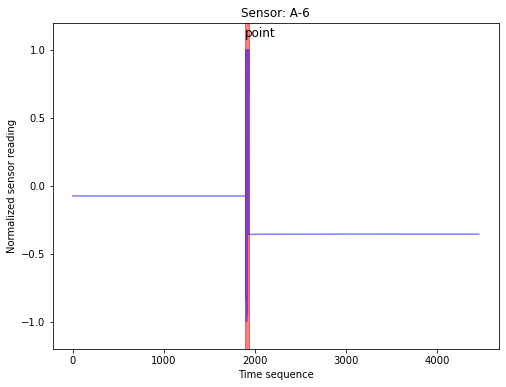

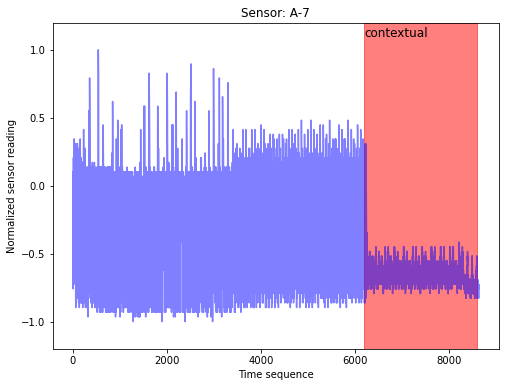

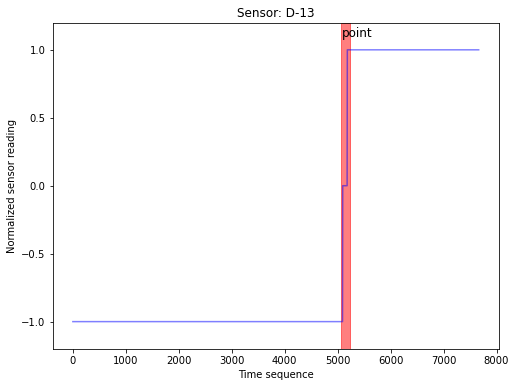

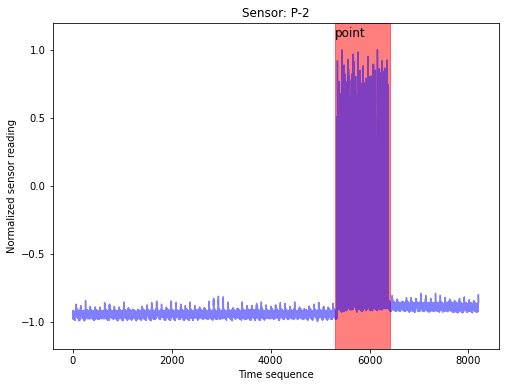

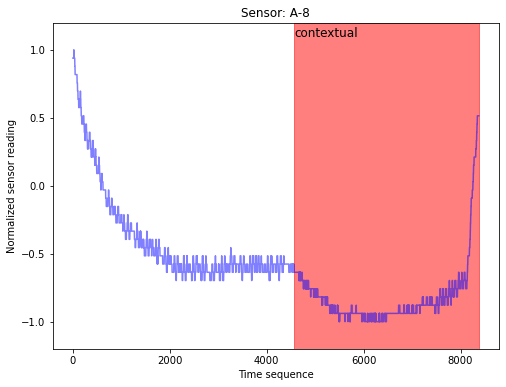

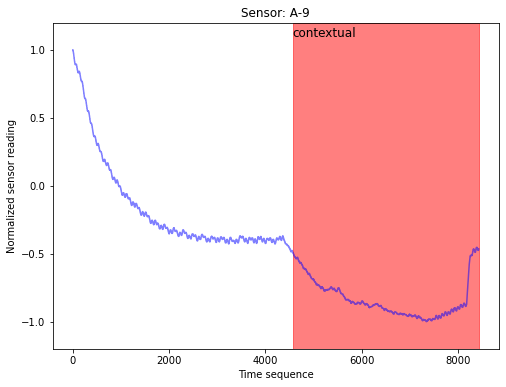

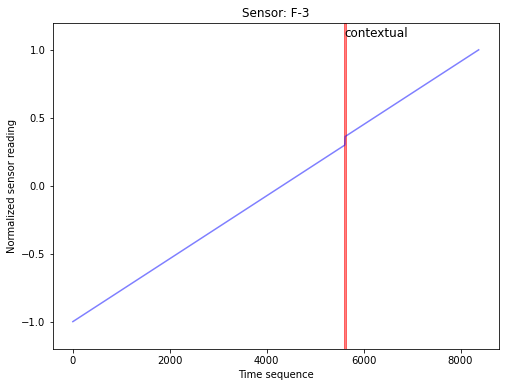

In [3]:
# print(LabelMSL['chan_id'])
DataID = 0
for DataID in range(0,len(LabelSMAP['chan_id'])):
    DataName = LabelSMAP['chan_id'][DataID]
    data_path = './data/test/'
    SMAPData = np.load(data_path+'%s.npy'%DataName)
    # print(SMAPData.shape)

    LabelA = (LabelSMAP['anomaly_sequences'].iloc()[DataID][1:-1])
    LabelA = LabelA.replace("[","").replace("]","").replace(" ","").split(",")
    
    ClassA = (LabelSMAP['class'].iloc()[DataID][1:-1])
    ClassA = ClassA.split(",")

    t=np.arange(0,len(SMAPData[:,0]),1)
    Y_min = min(SMAPData[:,0])-.2
    Y_max = max(SMAPData[:,0])+.2

    plt.figure(figsize=[8,6])
    plt.plot(t,SMAPData[:,0],color='blue',alpha=0.5)
    for L in range(0,len(LabelA),2):
        X_st =int(LabelA[L])
        X_ed = int(LabelA[L+1])
        plt.fill((t[X_st],t[X_st],t[X_ed],t[X_ed]),(Y_min,Y_max,Y_max,Y_min),color='red',alpha=0.5)
        plt.text(t[X_st],Y_max-0.1,"{}".format(ClassA[int(L/2)]),fontsize=12)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('Time sequence')
    plt.ylabel('Normalized sensor reading')
    plt.title('Sensor: %s'%DataName)

columns : time series
rows are as follows   
0th row: telemetry value  
others: cmd(true/false) to send and recieve modules respectively.  
ex)   
1th row: cmd sent to module A (true/false)   
2th row: cmd recieved from module B  
3th row: cmd sent to moduel B  
4th row: cmd recieved from module B  
     
     

/home/bijeon/anaconda3/envs/bijeon/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


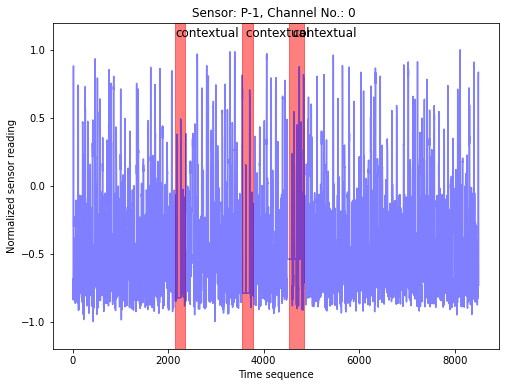

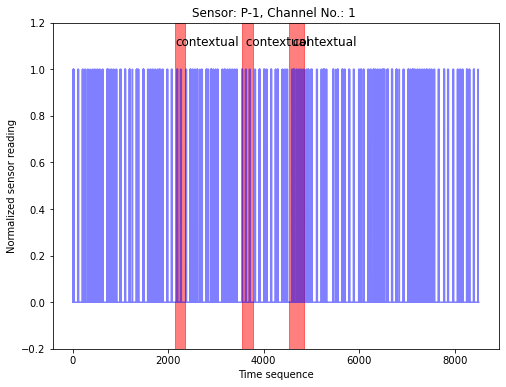

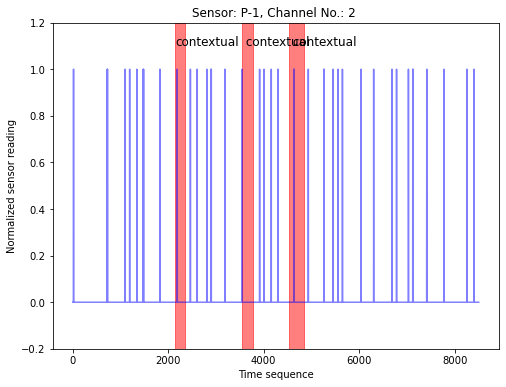

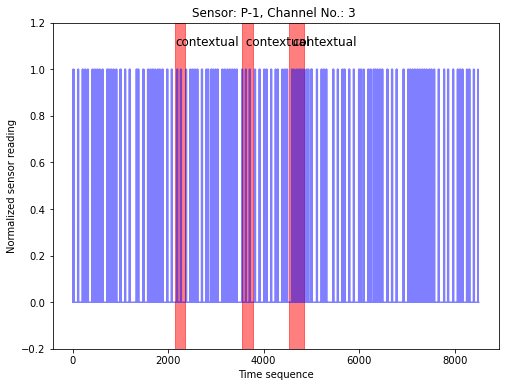

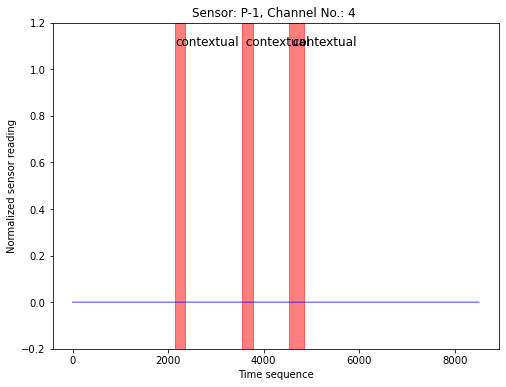

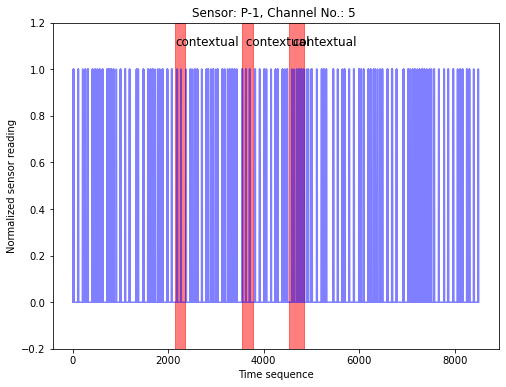

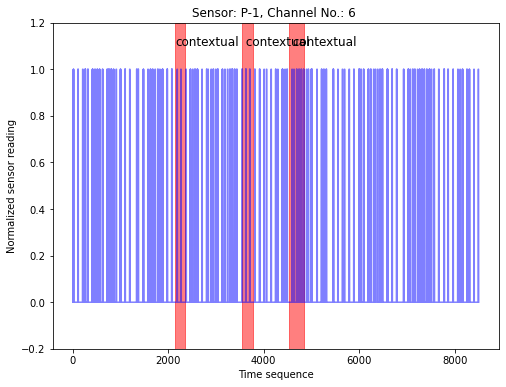

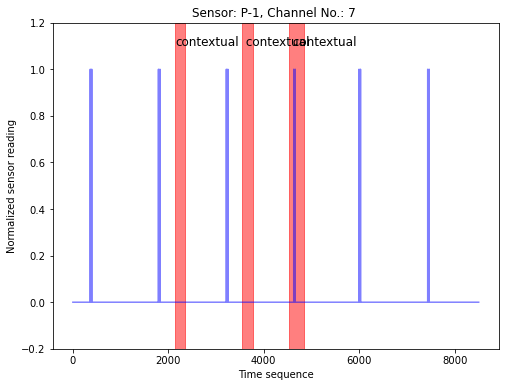

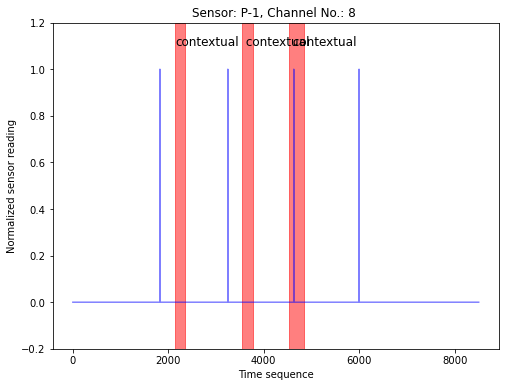

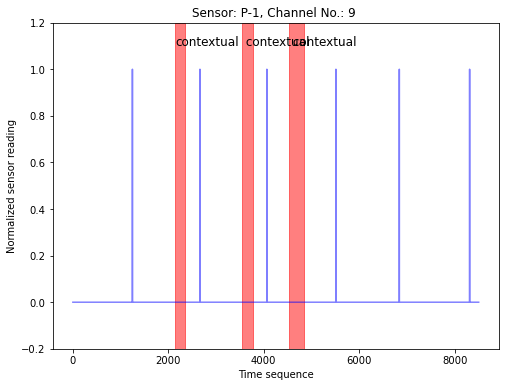

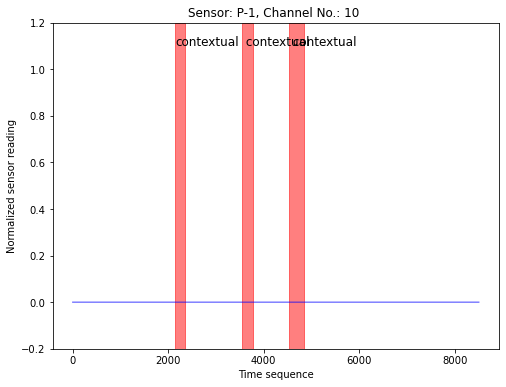

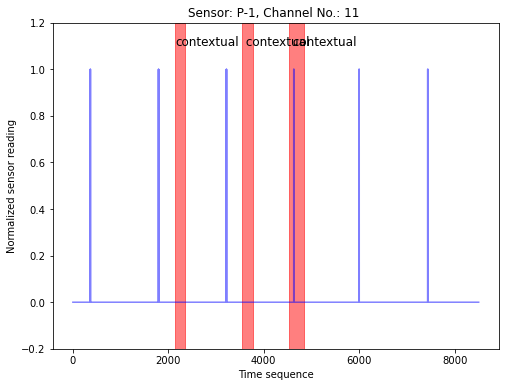

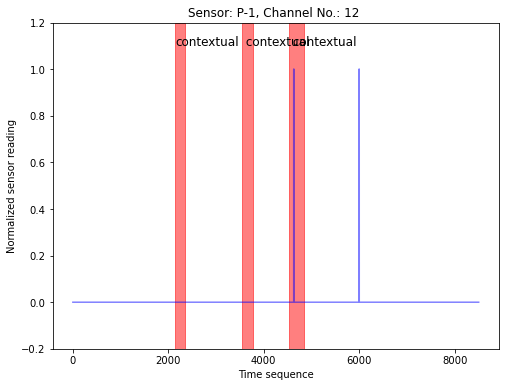

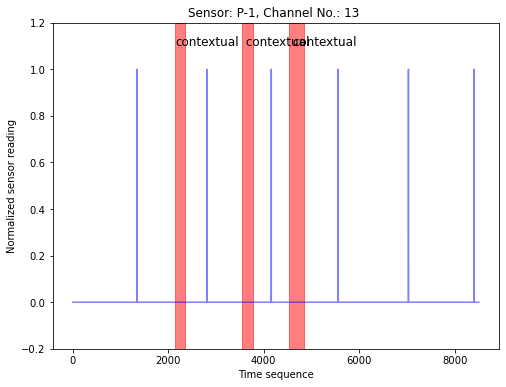

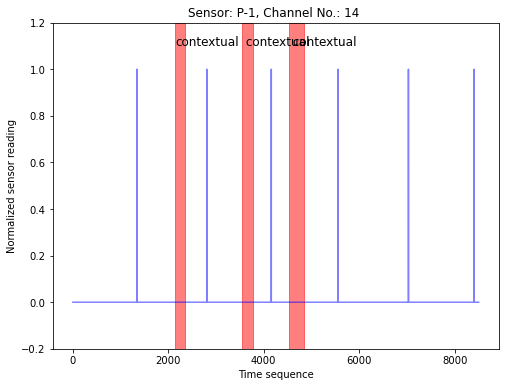

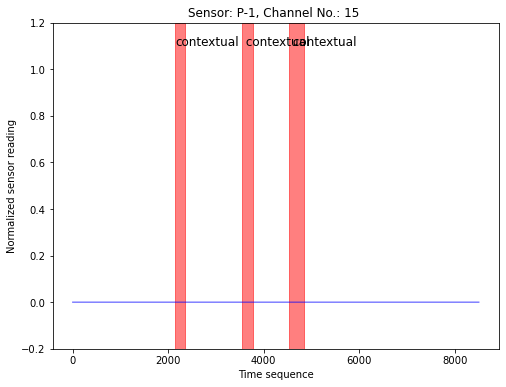

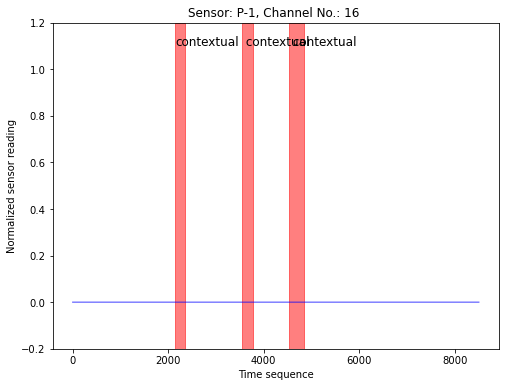

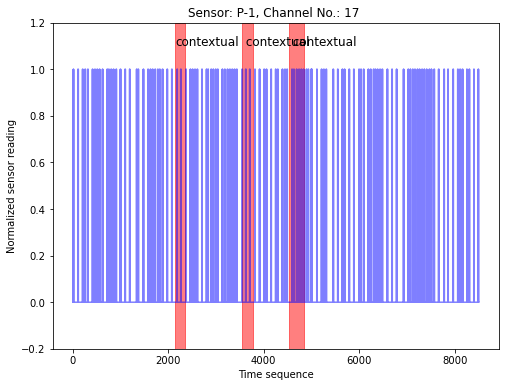

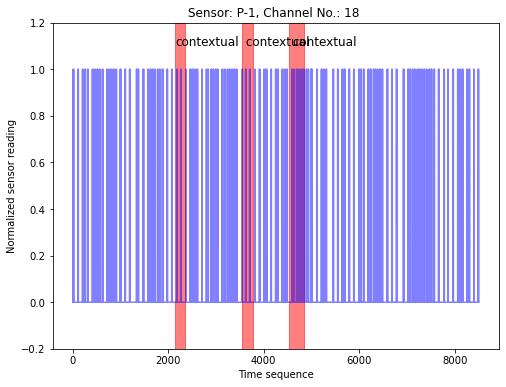

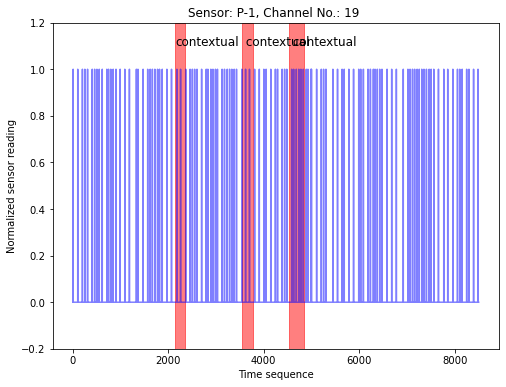

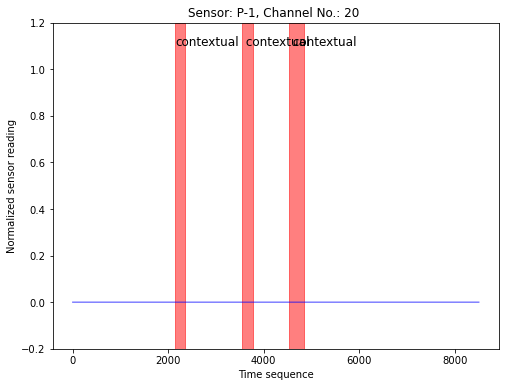

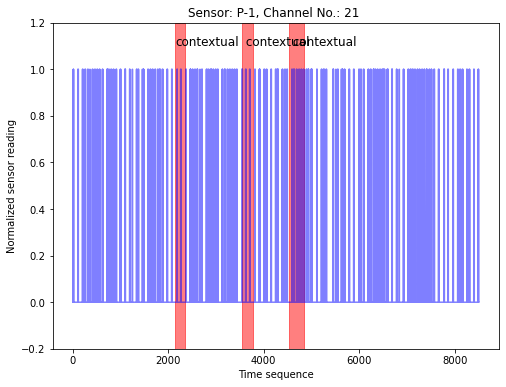

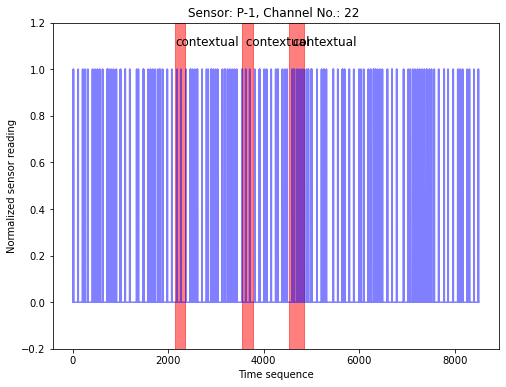

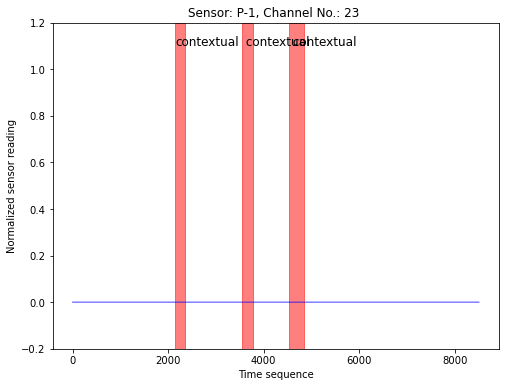

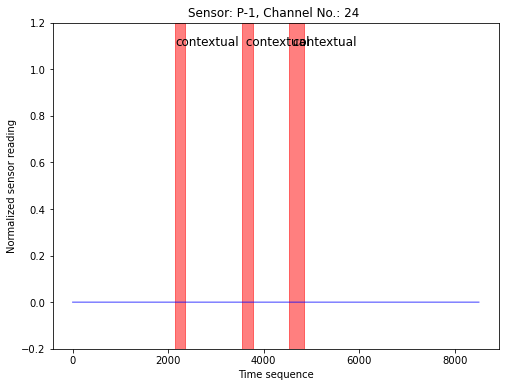

In [4]:
# print(LabelMSL['chan_id'])
len(SMAPData[:,0])

DataID = 0
for CH in range(0,len(SMAPData[0,:])):
    DataName = LabelSMAP['chan_id'][DataID]
    data_path = './data/test/'
    SMAPData = np.load(data_path+'%s.npy'%DataName)
    # print(SMAPData.shape)
    ClassA = (LabelSMAP['class'].iloc()[DataID][1:-1])
    ClassA = ClassA.split(",")

    LabelA = (LabelSMAP['anomaly_sequences'].iloc()[DataID][1:-1])
    LabelA = LabelA.replace("[","").replace("]","").replace(" ","").split(",")

    t=np.arange(0,len(SMAPData[:,CH]),1)
    Y_min = min(SMAPData[:,CH])-.2
    Y_max = max(SMAPData[:,0])+.2

    plt.figure(figsize=[8,6])
    plt.plot(t,SMAPData[:,CH],color='blue',alpha=0.5)
    for L in range(0,len(LabelA),2):
        X_st =int(LabelA[L])
        X_ed = int(LabelA[L+1])
        plt.fill((t[X_st],t[X_st],t[X_ed],t[X_ed]),(Y_min,Y_max,Y_max,Y_min),color='red',alpha=0.5)
        plt.text(t[X_st],Y_max-0.1,"{}".format(ClassA[int(L/2)]),fontsize=12)
    plt.ylim(Y_min,Y_max)
    plt.xlabel('Time sequence')
    plt.ylabel('Normalized sensor reading')
    plt.title('Sensor: %s, Channel No.: %s '%(DataName,CH))